# Machine learning 101

### Import librairies

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging

logger = logging.getLogger()

### Load random dataset 
made with http://robertgrantstats.co.uk/drawmydata.html

In [73]:
df = pd.read_csv("mydata.csv")

In [74]:
df.head()

,X,Y
0,40.5128,63.5096
1,55.3846,67.3558
2,76.1538,33.1250
3,-5.1282,85.8173
4,17.6923,79.6635


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       37 non-null     float64
 1   Y       37 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


### Let's show the dataset

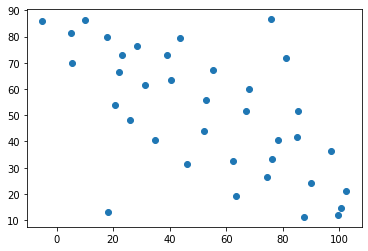

In [76]:
plt.scatter(df.X,df.Y)

### Linear regression
#### Predict x => ax + b

In [95]:
# let's find a 
mu_y = np.mean(df.Y)
mu_x = np.mean(df.X)
x = df.X
y = df.Y

In [94]:
a = np.sum((y - mu_y)*(x - mu_x)) / np.sum((x - mu_x)**2)
a

-0.4720222370793708

In [96]:
b = mu_y - a*mu_x
b

75.98570833216662

### Graphic linear regression and data

y = -0.4720*x+75.9857


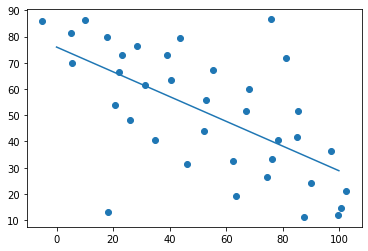

In [80]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
test = lambda x: a*x+b
plt.plot(x_test, test(x_test))
print(f"y = {a:.4f}*x+{b:.4f}")

plt.show()

### Common Error Measurements

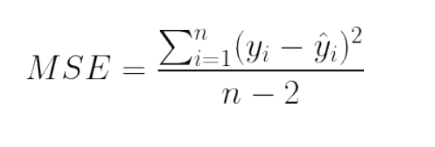
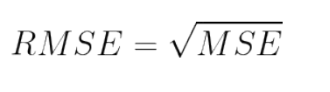

In [81]:
## Erreur quadratiques
n = len(df) # nombre de point de données
MSE = np.sum((y-test(df.X))**2)/(n) # -2 degree de liberté ( a et b sont 2 degrée de liberté)
RMSE = np.sqrt(MSE)

print(f'MSE = {MSE:.3f}')
print(f'RMSE = {RMSE:.3f}')

MSE = 338.387
RMSE = 18.395


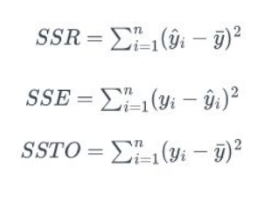
ŷ : the predicted value of y 

In [82]:
SSR = np.sum((test(x)-mu_y)**2)
SSE = np.sum((y-test(x))**2)
SSTO = np.sum((y-mu_y)**2)
print(f"SSR={SSR:.3}")
print(f"SSE={SSE:.3}")
print(f"SSTO={SSR:.3}")

SSR=7.76e+03
SSE=1.25e+04
SSTO=7.76e+03


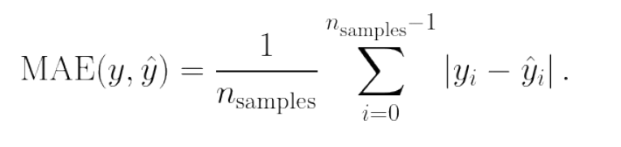

In [83]:
MAE = 1/n * np.sum(np.abs(y-test(x)))
MAE

14.432623087553687

Now using sklearn

In [84]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE_skl = mean_squared_error(y,test(x),squared=True)
# Root Mean Squared Error
RMSE_skl = MSE_skl**0.5
print("With sklearn we get : ")
print(f'MSE  = {MSE_skl:.3f}')
print(f'RMSE = {RMSE_skl:.3f}')

With sklearn we get : 
MSE  = 338.387
RMSE = 18.395


### Other methods of linear regession

- Conjugate gradient method
- newton method

### gradient descent

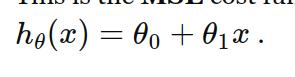

In [85]:
def f(a,b,x): # fonction 
    """
    a: coef directeur
    b: constante
    x : array
    """
    return a*x+b


In [86]:
# loss function chosen MSE because convex
def mse_db(y_data,x_data,a,b):
    # mse function derived with b
    n = len(x_data)
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    return 2*n*(-y_mean +a*x_mean+b)

def mse_da(y_data,x_data,a,b): # ok
    # mse function derived with a
    n = len(x_data)
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    return np.sum(((y_data-y_mean)-a*(x_data - x_mean))*(x_data - x_mean))*(-2/n)
    
def mse(a, b, x, y):
  return np.sum(np.square(y - (a*x+b)))/len(x)

### Steepest Descent Method

In [87]:
def gradient_descent(point,x,y,alpha):
    """
    point : random point
    n : number of iterations
    """
    a = [point[0]]
    b = [point[1]]
    grad_a = mse_da(y,x,a[-1],b[-1])
    grad_b = mse_db(y,x,a[-1],b[-1])
    while (grad_a**2 + grad_b**2)>=2.7**(-1):
        grad_a = mse_da(y,x,a[-1],b[-1])
        a.append(a[-1]-alpha*grad_a)
        grad_b = mse_db(y,x,a[-2],b[-1])
        b.append(b[-1]-alpha*grad_b)
    return a[-1],b[-1]

# start at a random point 
point_start = df.sample(1).values.tolist()[0]
a_g , b_g = gradient_descent(point_start,x,y,1e-4)

first method:
y = -0.4720*x+75.9857
gradient method
y = -0.4720*x+75.9776


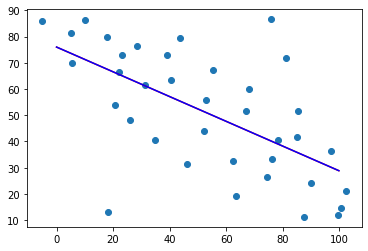

In [88]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
grad = lambda x: a_g*x+b_g
plt.plot(x_test, grad(x_test),color="red")
test = lambda x: a*x+b
plt.plot(x_test, test(x_test),color="blue")
print("first method:")
print(f"y = {a:.4f}*x+{b:.4f}")
print("gradient method")
print(f"y = {a_g:.4f}*x+{b_g:.4f}")
plt.show()

### Backtracking Line Search

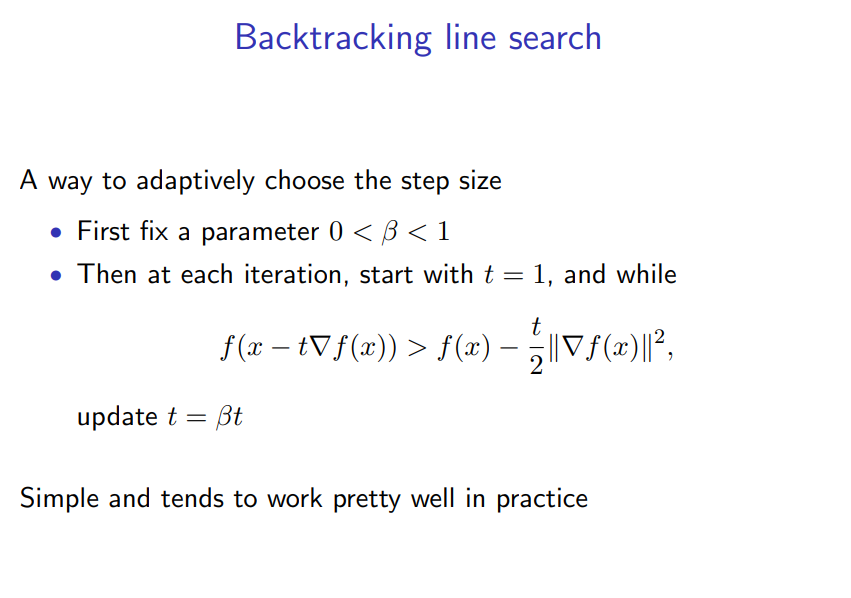

In [89]:
def gradient_descent_backtracking_line_search(point,x,y,alpha, beta, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    grad_a = mse_da(y,x,a,b)
    grad_b = mse_db(y,x,a,b)
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        if mse(a=a-alpha*grad_a, b=b-alpha*grad_b, x=x, y=y) < (mse(a=a, b=b, x=x, y=y)-alpha*(grad_a**2+ grad_b**2)/2):
          alpha *=beta
        a=a-alpha*grad_a
        b=b-alpha*grad_b
        grad_a =mse_da(y,x,a,b)
        grad_b = mse_db(y,x,a,b)
    logger.warning('Stop after %s iterations', i)
    return a, b
a_g_bls, b_g_bls = gradient_descent_backtracking_line_search(point=(0,0),x=x,y=y,alpha=0.001, beta=0.8, stop_criterion=1e-3)

Stop after 158 iterations


first method:
y = -0.4720*x+75.9857
gradient method
y = -0.4720*x+75.9776


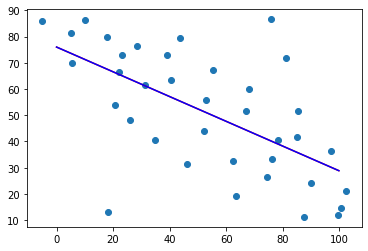

In [97]:
plt.scatter(x,y)
x_test = np.arange(0,100,0.1)
grad = lambda x: a_g_bls*x+b_g_bls
plt.plot(x_test, grad(x_test),color="red")
test = lambda x: a*x+b
plt.plot(x_test, test(x_test),color="blue")
print("first method:")
print(f"y = {a:.4f}*x+{b:.4f}")
print("gradient method")
print(f"y = {a_g:.4f}*x+{b_g:.4f}")
plt.show()

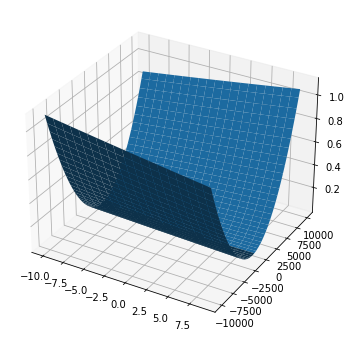

In [99]:
A, B = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10000, 10000, 100))
MSE = np.array([mse(a=a, b=b, x=x, y=y) for a, b in zip(A.ravel(), B.ravel())])
MSE = np.reshape(MSE, A.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(A, B, MSE)
plt.show()

In [100]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=MSE, x=A, y=B)])
fig = px.line_3d()
fig.update_layout(title='Mean Squared Error', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [101]:
def gradient_descent_backtracking_line_search_iterative_point(point,x,y,alpha, beta, stop_criterion):
    """
    point : random point
    n : number of iterations
    """
    i=0
    a = point[0]
    b = point[1]
    grad_a = mse_da(y,x,a,b)
    grad_b = mse_db(y,x,a,b)
    points=[(a, b)]  # added
    while (grad_a**2 + grad_b**2)>=stop_criterion:
        i+=1
        if mse(a=a-alpha*grad_a, b=b-alpha*grad_b, x=x, y=y) < (mse(a=a, b=b, x=x, y=y)-alpha*(grad_a**2+ grad_b**2)/2):
          alpha *=beta
        a=a-alpha*grad_a
        b=b-alpha*grad_b
        points.append((a, b))  # added
        grad_a =mse_da(y,x,a,b)
        grad_b = mse_db(y,x,a,b)
    logger.warning('Stop after %s iterations', i)
    return a, b, points
a_g_bls, b_g_bls, points = gradient_descent_backtracking_line_search_iterative_point(point=(0,0),x=x,y=y,alpha=0.001, beta=0.8, stop_criterion=1e-3)

Stop after 158 iterations


In [102]:
A, B = np.meshgrid(np.arange(-4, 2, 0.1), np.arange(-100, 200, 1))
MSE = np.array([mse(a=a, b=b, x=x, y=y) for a, b in zip(A.ravel(), B.ravel())])
MSE = np.reshape(MSE, A.shape)
fig = go.Figure(data=[go.Surface(z=MSE, x=A, y=B)])
a_points, b_points = zip(*points)

fig.add_scatter3d(x=a_points, y=b_points, z=[mse(a=a, b=b, x=x, y=y) for (a,b) in points])
fig.update_layout(title='Mean Squared Error', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()